In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\us_change.csv"

df = pd.read_csv(path)
df.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


In [3]:
df['date'] = pd.to_datetime(df['Quarter'].str.replace(r'Q1', '03')
                                       .str.replace(r'Q2', '06')
                                       .str.replace(r'Q3', '09')
                                       .str.replace(r'Q4', '12'),
                            format='%Y %m') + pd.offsets.MonthEnd(0)

df.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment,date
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9,1970-03-31
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5,1970-06-30
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5,1970-09-30
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7,1970-12-31
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1,1971-03-31


In [4]:
us_long = df.melt(id_vars=['date'], value_vars=['Consumption', 'Income'], 
                         var_name='Series', value_name='Value')
us_long.head()

,date,Series,Value
0,1970-03-31,Consumption,0.618566
1,1970-06-30,Consumption,0.451984
2,1970-09-30,Consumption,0.872872
3,1970-12-31,Consumption,-0.271848
4,1971-03-31,Consumption,1.901345


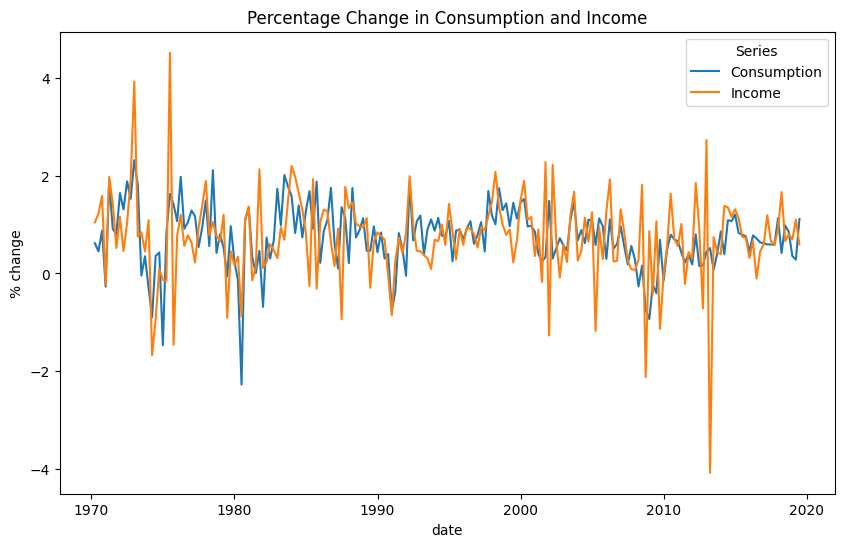

In [5]:
# Graficamos los datos en formato largo
plt.figure(figsize=(10, 6))
sns.lineplot(data=us_long, x='date', y='Value', hue='Series')

# Añadimos etiquetas y título
plt.ylabel("% change")
plt.title("Percentage Change in Consumption and Income")
plt.legend(title="Series")
plt.show()

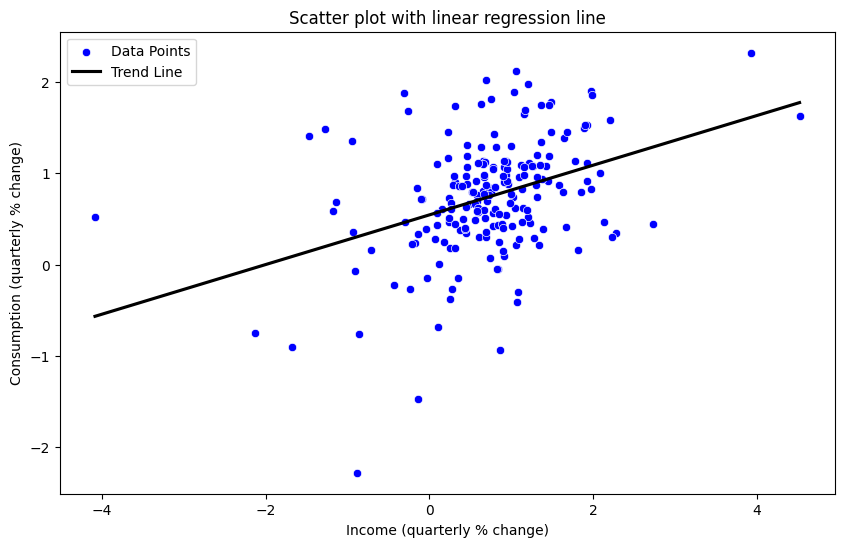

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con color para los puntos
sns.scatterplot(data=df, x='Income', y='Consumption', color='blue', label='Data Points')

# Línea de regresión con color diferente
sns.regplot(data=df, x='Income', y='Consumption', scatter=False, color='black', ci=None, label='Trend Line')  

# Etiquetas
plt.ylabel("Consumption (quarterly % change)")
plt.xlabel("Income (quarterly % change)")
plt.title("Scatter plot with linear regression line")

# Agregamos la leyenda
plt.legend()

plt.show()

In [7]:
import statsmodels.api as sm
import pandas as pd

# Supongamos que `us_change` es tu DataFrame con las columnas 'Consumption' e 'Income'

# Agregar una constante para el término de intersección
X = df['Income']
X = sm.add_constant(X)  # Esto agrega una columna de 1s para el intercepto

# Definir la variable dependiente
y = df['Consumption']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Generar un resumen del modelo
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     33.84
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.40e-08
Time:                        18:00:32   Log-Likelihood:                -175.65
No. Observations:                 198   AIC:                             355.3
Df Residuals:                     196   BIC:                             361.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5445      0.054     10.079      0.000       0.438       0.651
Income         0.2718      0.047      5.817      0.000       0.180       0.364
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.285
Skew:                          -0.476   Prob(JB):                     2.95e-09
Kurtosis:                       4.964   Cond. No.                         2.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

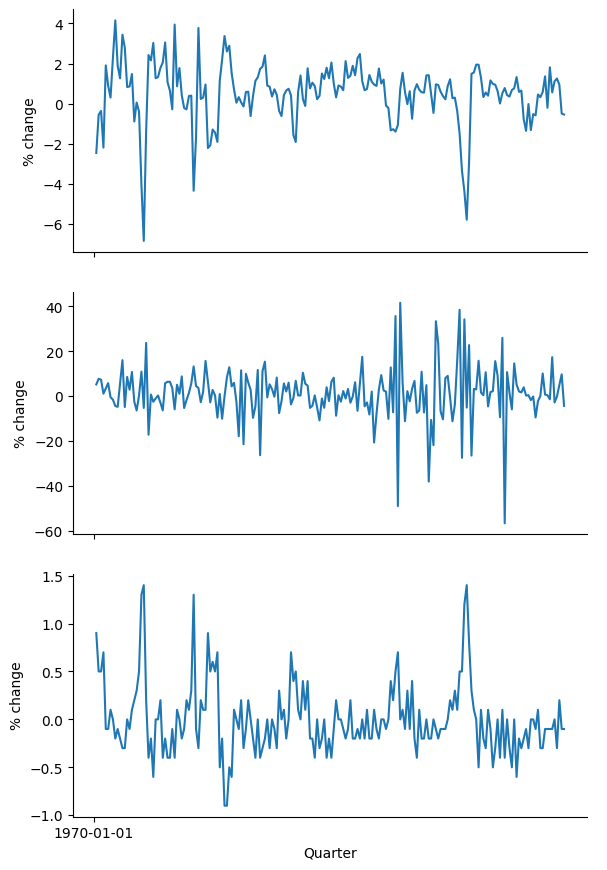

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que `us_change` es tu DataFrame
# Eliminamos las columnas 'Consumption' e 'Income' y hacemos un `melt`
df_long = df.drop(columns=['Consumption', 'Income', 'Quarter']).melt(id_vars='date', var_name='name', value_name='value')

# Crear el gráfico con FacetGrid
g = sns.FacetGrid(df_long, col='name', col_wrap=1, sharey=False, height=3, aspect=2)
g.map_dataframe(sns.lineplot, x='date', y='value')  # Eliminamos `palette='tab10'`
g.set_titles("{col_name}")
g.set_axis_labels("Quarter", "% change")
g.add_legend()
g.set_titles("")

# Ajustar el espaciado del eje x usando step
step = 1000 # Cada 12 puntos en el eje
x_ticks = range(0, len(df_long), step)

# Aplicar los xticks a cada subgráfico
for ax in g.axes.flat:
    ax.set_xticks(x_ticks)

plt.show()


In [9]:
df_long

,date,name,value
0,1970-03-31,Production,-2.452486
1,1970-06-30,Production,-0.551459
2,1970-09-30,Production,-0.358652
3,1970-12-31,Production,-2.185691
4,1971-03-31,Production,1.909764
...,...,...,...
589,2018-06-30,Unemployment,0.000000
590,2018-09-30,Unemployment,-0.300000
591,2018-12-31,Unemployment,0.200000
592,2019-03-31,Unemployment,-0.100000


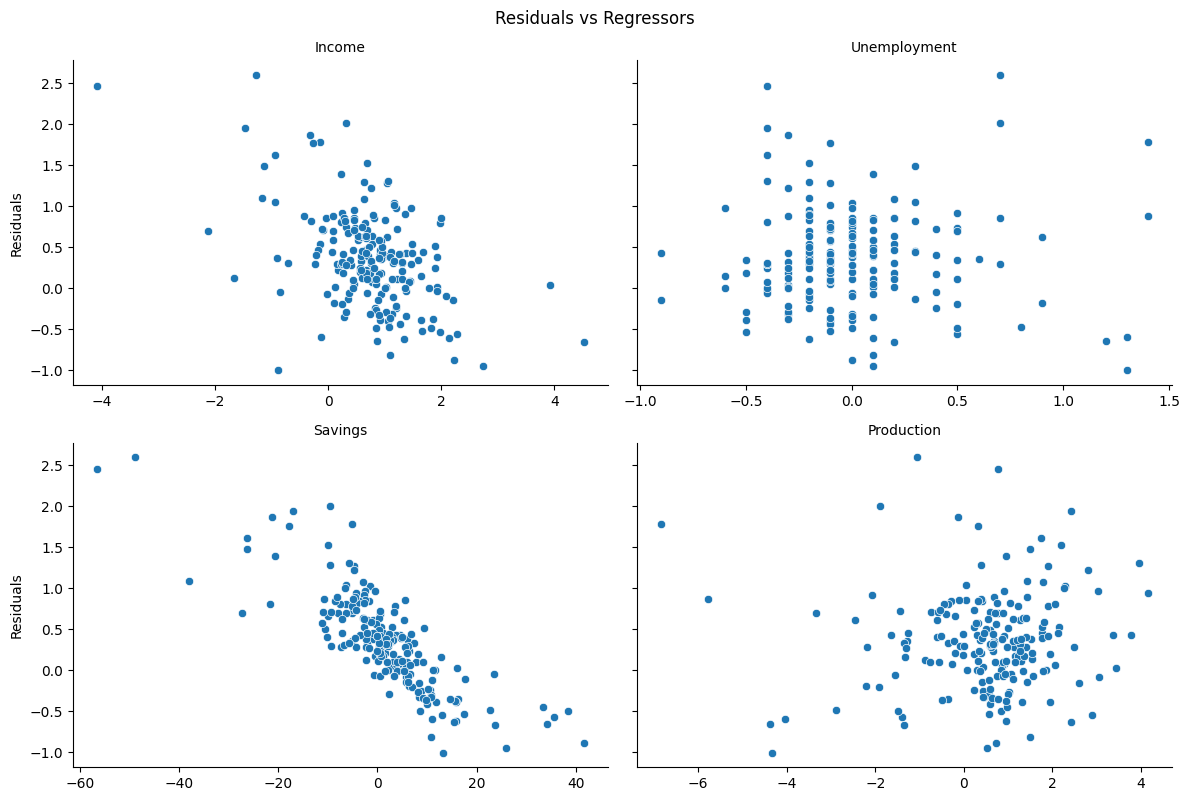

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS

# Asumiendo que `us_change` es tu DataFrame original y tiene una columna 'Quarter'
# Y que 'Income', 'Unemployment' son variables en `us_change` usadas en el modelo
# Ajustamos un modelo de ejemplo para obtener residuos (ajusta según tu modelo)
fit_consMR = OLS(df['Consumption'], df[['Income', 'Unemployment']]).fit()
df['residuals'] = fit_consMR.resid  # Añade los residuos al DataFrame

# Transformar el DataFrame al formato largo
df_long = df.melt(id_vars=['Quarter', 'residuals'], value_vars=['Income', 'Unemployment', 'Savings', 'Production'],
                         var_name='regressor', value_name='x')

# Crear el gráfico
g = sns.FacetGrid(df_long, col='regressor', col_wrap=2, sharex=False, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='x', y='residuals')
g.set_axis_labels("", "Residuals")
g.set_titles("{col_name}")
plt.suptitle("Residuals vs Regressors", y=1.02)  # Título general del gráfico
plt.show()


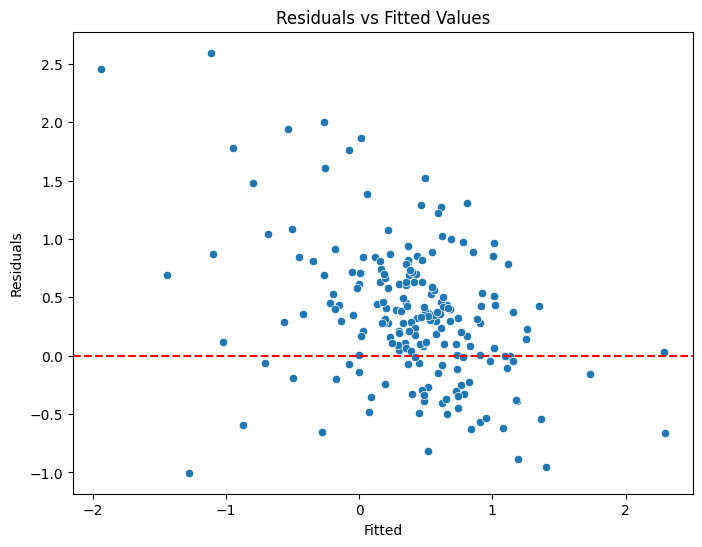

In [11]:
# Asumiendo que `us_change` es tu DataFrame y que has ajustado el modelo `fit_consMR`
# Ajuste de un modelo de ejemplo para obtener residuos y valores ajustados
fit_consMR = OLS(df['Consumption'], df[['Income', 'Unemployment']]).fit()

# Crear un DataFrame con los valores ajustados y residuos
df_augmented = pd.DataFrame({
    'Fitted': fit_consMR.fittedvalues,
    'Residuals': fit_consMR.resid
})

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_augmented, x='Fitted', y='Residuals')
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [14]:
path2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"
ap = pd.read_csv(path2)
ap.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5


In [15]:
ap['date'] = pd.to_datetime(ap['Quarter'].str.replace(r'Q1', '03')
                                       .str.replace(r'Q2', '06')
                                       .str.replace(r'Q3', '09')
                                       .str.replace(r'Q4', '12'),
                            format='%Y %m') + pd.offsets.MonthEnd(0)
ap['year'] = ap['date'].dt.year
ap.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,date,year
0,1956 Q1,284,5225.0,189.0,465,3923,5,1956-03-31,1956


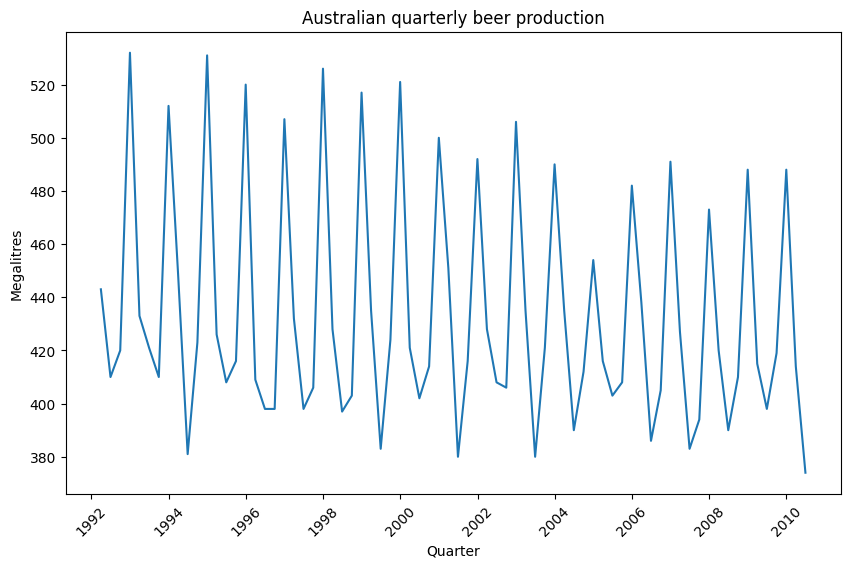

In [17]:
recent_production = ap[ap['year'] >= 1992]

# Crear el gráfico de producción de cerveza
plt.figure(figsize=(10, 6))
sns.lineplot(data=recent_production, x='date', y='Beer')
plt.ylabel("Megalitres")
plt.title("Australian quarterly beer production")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.show()

In [23]:
from statsmodels.formula.api import ols

# Supongamos que `recent_production` tiene una columna 'Beer' y 'Quarter' como índice
# Añadir variables de tendencia y estacionalidad
recent_production['trend'] = np.arange(len(recent_production))
recent_production['season'] = recent_production['date'].dt.quarter

# Definir el modelo de tendencia y estacionalidad
model = ols('Beer ~ trend + C(season)', data=recent_production).fit()
# Añadir los valores ajustados (fitted values) al DataFrame
recent_production['fitted'] = model.fittedvalues

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Beer   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.97e-38
Time:                        18:20:36   Log-Likelihood:                -287.70
No. Observations:                  74   AIC:                             585.4
Df Residuals:                      69   BIC:                             596.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        441.4602      3.690    119.

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2520045452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production['trend'] = np.arange(len(recent_production))
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2520045452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production['season'] = recent_production['date'].dt.quarter
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2520045452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

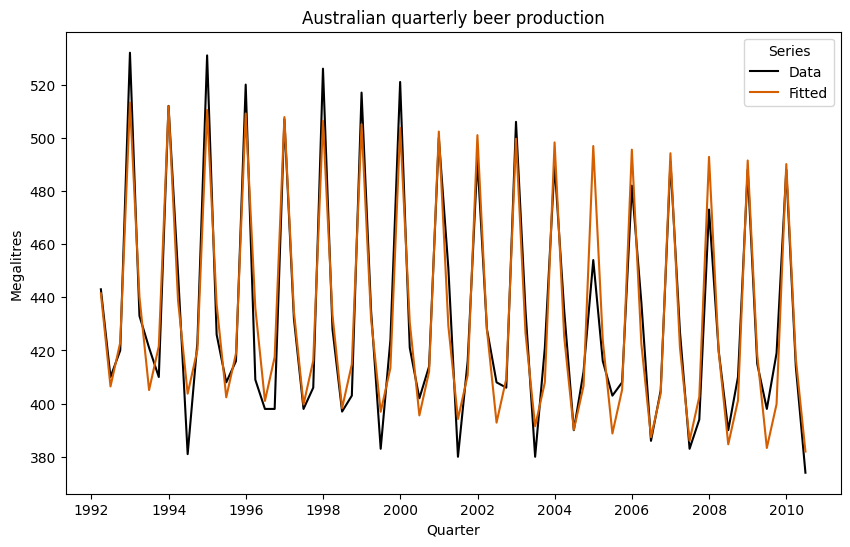

In [25]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales
sns.lineplot(data=recent_production, x='date', y='Beer', color='black', label='Data')

# Graficar los valores ajustados
sns.lineplot(data=recent_production, x='date', y='fitted', color='#D55E00', label='Fitted')

# Personalizar leyendas y etiquetas
plt.ylabel("Megalitres")
plt.xlabel("Quarter")
plt.title("Australian quarterly beer production")
plt.legend(title="Series")

# Mostrar el gráfico
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\1633398433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production['trend'] = np.arange(len(recent_production))  # Tendencia
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\1633398433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production['season'] = recent_production['date'].dt.quarter  # Estacionalidad (trimestres)
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\1633398433.py:20: SettingWithCopyWarning: 
A value is trying to be set

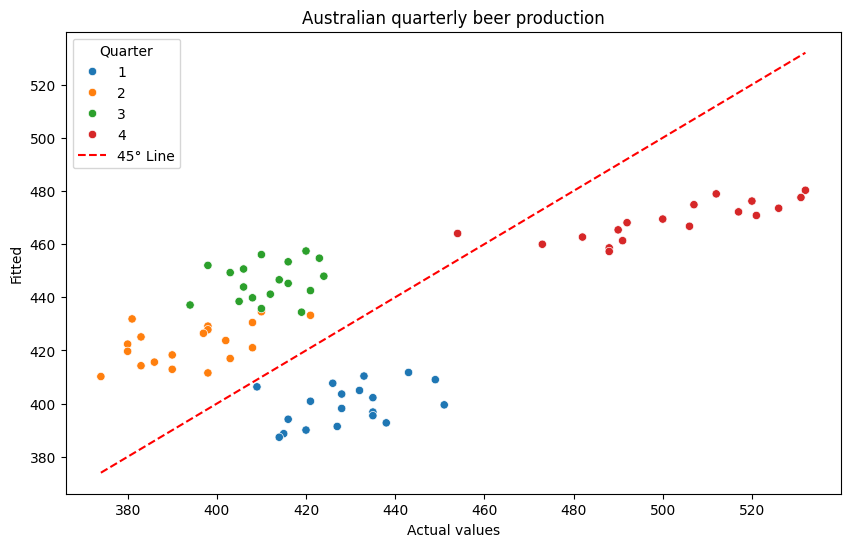

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que `recent_production` tiene las columnas 'Beer' y 'Quarter'
# Añadir variables de tendencia y estacionalidad
recent_production['trend'] = np.arange(len(recent_production))  # Tendencia
recent_production['season'] = recent_production['date'].dt.quarter  # Estacionalidad (trimestres)

# Crear el modelo de regresión con 'Beer' como variable dependiente y 'trend' y 'season' como variables explicativas
X = sm.add_constant(recent_production[['trend', 'season']])  # Añadir constante para la intersección
y = recent_production['Beer']

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Obtener los valores ajustados
recent_production['fitted'] = model.fittedvalues

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales frente a los ajustados
sns.scatterplot(data=recent_production, x='Beer', y='fitted', hue='season', palette='tab10')

# Añadir una línea de 45 grados (y = x)
plt.plot([recent_production['Beer'].min(), recent_production['Beer'].max()],
         [recent_production['Beer'].min(), recent_production['Beer'].max()],
         color='red', linestyle='--', label='45° Line')

# Personalizar leyendas y etiquetas
plt.xlabel('Actual values')
plt.ylabel('Fitted')
plt.title('Australian quarterly beer production')
plt.legend(title='Quarter')

# Mostrar el gráfico
plt.show()


In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suponiendo que 'recent_production' tiene las columnas 'Beer' y 'Quarter'
# Añadir la variable de tendencia
recent_production['trend'] = np.arange(len(recent_production))

# # Convertir 'Quarter' en formato datetime si no lo es
# recent_production['date'] = pd.to_datetime(recent_production['date'])

# Generar términos de Fourier (K=2)
n = len(recent_production)
t = np.arange(n)
K = 2  # Número de términos de Fourier

# Crear las componentes de Fourier (seno y coseno)
for k in range(1, K+1):
    recent_production[f'sin_{k}'] = np.sin(2 * np.pi * k * t / n)
    recent_production[f'cos_{k}'] = np.cos(2 * np.pi * k * t / n)

# Definir las variables independientes (trend y componentes de Fourier)
X = sm.add_constant(recent_production[['trend'] + [f'sin_{k}' for k in range(1, K+1)] + [f'cos_{k}' for k in range(1, K+1)]])  # Añadir constante
y = recent_production['Beer']

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Beer   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.3923
Date:                Mon, 11 Nov 2024   Prob (F-statistic):              0.852
Time:                        18:26:35   Log-Likelihood:                -382.15
No. Observations:                  74   AIC:                             776.3
Df Residuals:                      68   BIC:                             790.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1297     18.649     23.922      0.0

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2628401411.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production['trend'] = np.arange(len(recent_production))
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2628401411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_production[f'sin_{k}'] = np.sin(2 * np.pi * k * t / n)
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2628401411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [6]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"
aus_production = pd.read_csv(path)

aus_production['date'] = pd.to_datetime(aus_production['Quarter'].str.replace(r'Q1', '03')
                                       .str.replace(r'Q2', '06')
                                       .str.replace(r'Q3', '09')
                                       .str.replace(r'Q4', '12'),
                            format='%Y %m') + pd.offsets.MonthEnd(0)
aus_production['year'] = aus_production['date'].dt.year
aus_production.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,date,year
0,1956 Q1,284,5225.0,189.0,465,3923,5,1956-03-31,1956


C:\Users\HP\AppData\Local\Temp\ipykernel_12720\4292680.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(recent_production['date'].max() + QuarterEnd(),


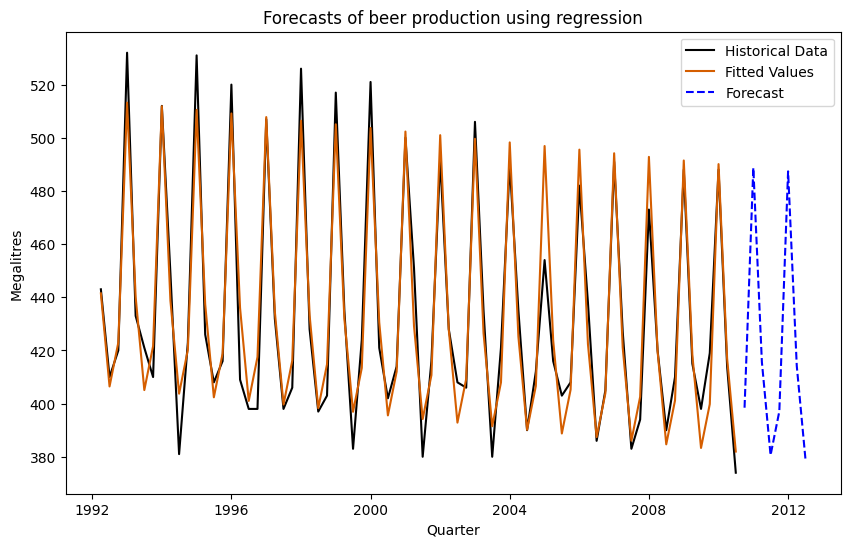

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.tseries.offsets import QuarterEnd

# Cargar los datos (sustituye esto con tu DataFrame 'aus_production')
# Asegúrate de que tienes una columna 'Beer' y una columna 'Quarter' en formato de fecha.
# Aquí `aus_production` es un DataFrame de ejemplo que deberás cargar o definir.

# Filtrar los datos desde el año 1992
recent_production = aus_production[aus_production['date'].dt.year >= 1992].copy()
recent_production['trend'] = np.arange(len(recent_production))  # Crear la variable de tendencia
recent_production['season'] = recent_production['date'].dt.quarter  # Crear la variable estacional

# Ajustar el modelo de regresión con tendencia y estacionalidad
model = ols('Beer ~ trend + C(season)', data=recent_production).fit()

# Hacer predicciones para el período de entrenamiento
recent_production['fitted'] = model.fittedvalues

# Crear un DataFrame para las predicciones futuras
forecast_periods = 8  # Número de trimestres a predecir
future_dates = pd.date_range(recent_production['date'].max() + QuarterEnd(), 
                             periods=forecast_periods, freq='Q')
future_data = pd.DataFrame({
    'Quarter': future_dates,
    'trend': np.arange(len(recent_production), len(recent_production) + forecast_periods),
    'season': future_dates.quarter
})

# Generar predicciones para el período futuro
future_data['forecast'] = model.predict(sm.add_constant(future_data[['trend', 'season']]))

# Graficar los datos y los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(recent_production['date'], recent_production['Beer'], label='Historical Data', color='black')
plt.plot(recent_production['date'], recent_production['fitted'], label='Fitted Values', color='#D55E00')
plt.plot(future_data['Quarter'], future_data['forecast'], label='Forecast', color='blue', linestyle='--')

# Etiquetas y leyenda
plt.title("Forecasts of beer production using regression")
plt.ylabel("Megalitres")
plt.xlabel("Quarter")
plt.legend()
plt.show()